# Task3:- College Event Feedback Analysis – Internship Project

### SECTION 1: Install & Import Libraries

#### Install TextBlob (one-time, in first cell)
!pip install textblob wordcloud

In [44]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

-------
### SECTION 2: Load & Explore Data

In [45]:
# Load the CSV
df = pd.read_csv('student_feedback.csv')

# Display basic info
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)

Dataset shape: (1001, 10)

Column names:
['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

First few rows:
   Unnamed: 0  Student ID  Well versed with the subject  \
0           0         340                             5   
1           1         253                             6   
2           2         680                             7   
3           3         806                             9   
4           4         632                             8   

   Explains concepts in an understandable way  Use of presentations  \
0                                           2                     7   
1                                           5                     8   
2                                           7   

------------
### SECTION 3: Data Cleaning

In [46]:
# SECTION 3 – Data cleaning (fixed)

df_clean = df.dropna(how='all').reset_index(drop=True)

# Explicitly define rating columns (exclude index & Student ID)
rating_cols = [
    'Well versed with the subject',
    'Explains concepts in an understandable way',
    'Use of presentations',
    'Degree of difficulty of assignments',
    'Solves doubts willingly',
    'Structuring of the course',
    'Provides support for students going above and beyond',
    'Course recommendation based on relevance'
]

print(f"Rating columns ({len(rating_cols)}):")
print(rating_cols)

for col in rating_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("\nCleaned data shape:", df_clean.shape)

Rating columns (8):
['Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']

Cleaned data shape: (1001, 10)


-----------
### SECTION 4: Descriptive Statistics & Overall Satisfaction

In [47]:
# Overall average rating across all questions
overall_avg = df_clean[rating_cols].mean().mean()
print(f"Overall Average Rating (across all questions): {overall_avg:.2f}/10")

# Average rating per question
question_avg = df_clean[rating_cols].mean().sort_values(ascending=False)
print("\nAverage Rating per Question (sorted):")
print(question_avg.round(2))

# Standard deviation (to see consistency)
question_std = df_clean[rating_cols].std()
print("\nStandard Deviation per Question (lower = more consistent):")
print(question_std.round(2))

# Total students
total_students = len(df_clean)
print(f"\nTotal Students Surveyed: {total_students}")

Overall Average Rating (across all questions): 5.92/10

Average Rating per Question (sorted):
Well versed with the subject                            7.50
Explains concepts in an understandable way              6.08
Use of presentations                                    5.94
Provides support for students going above and beyond    5.66
Structuring of the course                               5.64
Course recommendation based on relevance                5.60
Solves doubts willingly                                 5.47
Degree of difficulty of assignments                     5.43
dtype: float64

Standard Deviation per Question (lower = more consistent):
Well versed with the subject                            1.69
Explains concepts in an understandable way              2.60
Use of presentations                                    1.42
Degree of difficulty of assignments                     2.87
Solves doubts willingly                                 2.87
Structuring of the course             

---------------
### SECTION 5: Create Satisfaction Segments

In [48]:
# Create an "Overall Satisfaction" score per student (mean of all ratings)
df_clean['Overall_Score'] = df_clean[rating_cols].mean(axis=1)

# Categorize satisfaction
def satisfaction_level(score):
    if score >= 8:
        return 'Highly Satisfied (8-10)'
    elif score >= 6:
        return 'Satisfied (6-7.9)'
    elif score >= 4:
        return 'Neutral (4-5.9)'
    else:
        return 'Dissatisfied (<4)'

df_clean['Satisfaction_Level'] = df_clean['Overall_Score'].apply(satisfaction_level)

# Count by satisfaction level
satisfaction_counts = df_clean['Satisfaction_Level'].value_counts()
print("Student Count by Satisfaction Level:")
print(satisfaction_counts)

# Percentage breakdown
print("\nPercentage breakdown:")
print((satisfaction_counts / total_students * 100).round(2))

Student Count by Satisfaction Level:
Satisfaction_Level
Neutral (4-5.9)            523
Satisfied (6-7.9)          456
Highly Satisfied (8-10)     12
Dissatisfied (<4)           10
Name: count, dtype: int64

Percentage breakdown:
Satisfaction_Level
Neutral (4-5.9)            52.25
Satisfied (6-7.9)          45.55
Highly Satisfied (8-10)     1.20
Dissatisfied (<4)           1.00
Name: count, dtype: float64


----
### SECTION 6: Visualization 1 – Bar Chart: Average Rating per Question

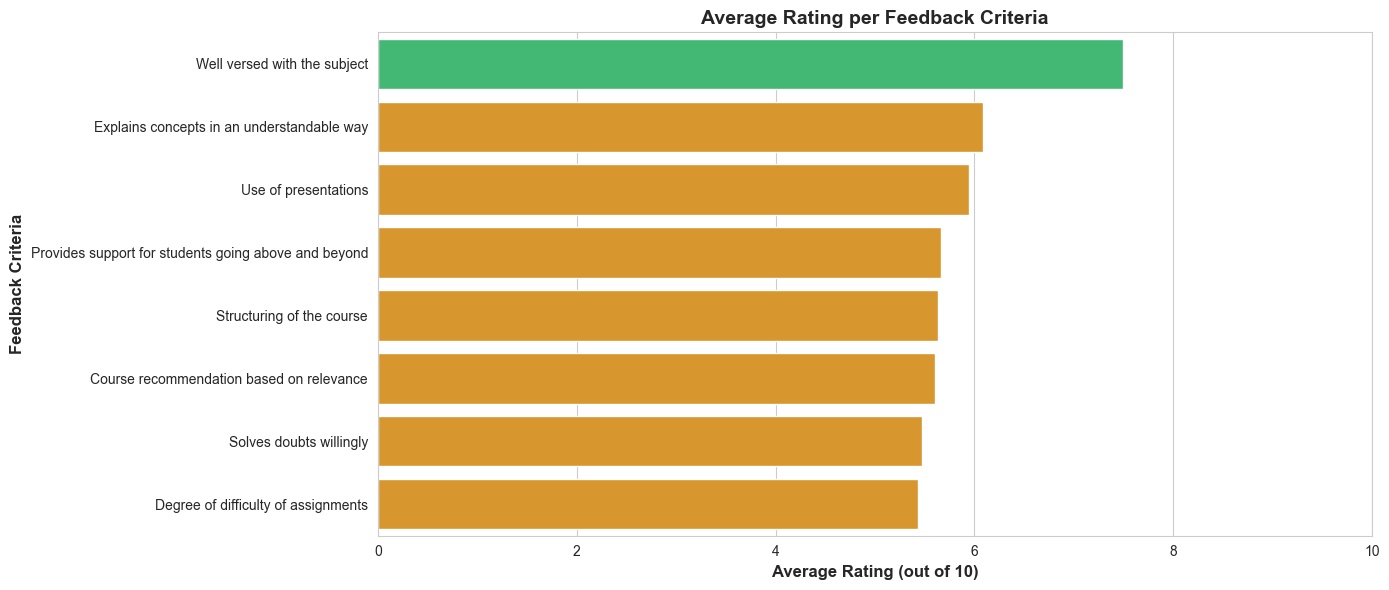

✓ Chart saved as 'ratings_by_criteria.png'


In [49]:
# Create bar chart
plt.figure(figsize=(14, 6))
colors = ['#2ecc71' if x >= 7 else '#f39c12' if x >= 5 else '#e74c3c' for x in question_avg.values]
sns.barplot(x=question_avg.values, y=question_avg.index, palette=colors, orient='h')
plt.xlabel('Average Rating (out of 10)', fontsize=12, fontweight='bold')
plt.ylabel('Feedback Criteria', fontsize=12, fontweight='bold')
plt.title('Average Rating per Feedback Criteria', fontsize=14, fontweight='bold')
plt.xlim(0, 10)
plt.tight_layout()
plt.savefig('ratings_by_criteria.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved as 'ratings_by_criteria.png'")

#### SECTION 7: Visualization 2 – Pie Chart: Satisfaction Level Distribution

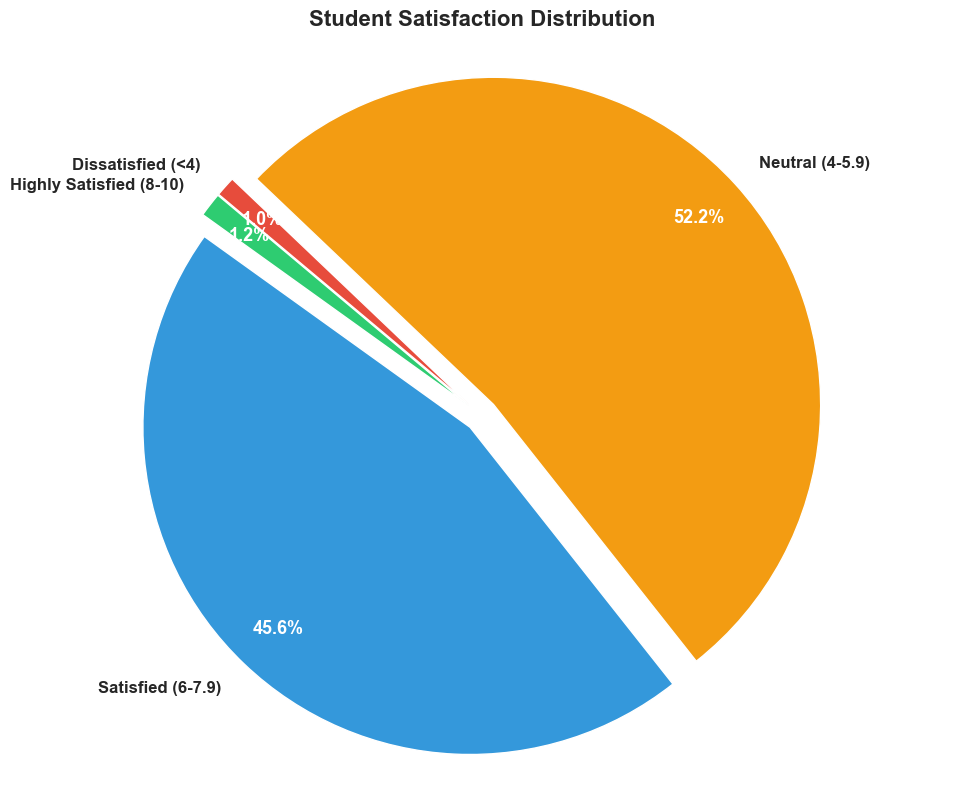

✓ Chart saved as 'satisfaction_distribution.png'

Breakdown:
  Highly Satisfied (8-10): 12 students (1.2%)
  Satisfied (6-7.9): 456 students (45.6%)
  Neutral (4-5.9): 523 students (52.2%)
  Dissatisfied (<4): 10 students (1.0%)


In [50]:

plt.figure(figsize=(10, 8))

# Sort satisfaction counts by predefined order for consistency
order = ['Highly Satisfied (8-10)', 'Satisfied (6-7.9)', 'Neutral (4-5.9)', 'Dissatisfied (<4)']
satisfaction_ordered = satisfaction_counts.reindex(order, fill_value=0)
satisfaction_ordered = satisfaction_ordered[satisfaction_ordered > 0]  # Remove zero categories

n_slices = len(satisfaction_ordered)
explode = [0.05] * n_slices
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c'][:n_slices]

wedges, texts, autotexts = plt.pie(
    satisfaction_ordered.values,
    labels=satisfaction_ordered.index,
    autopct='%1.1f%%',
    colors=colors_pie,
    explode=explode,
    startangle=140,
    textprops={'fontsize': 12, 'weight': 'bold'},
    pctdistance=0.85
)

# Make percentage text more readable
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_weight('bold')

plt.title('Student Satisfaction Distribution', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig('satisfaction_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Chart saved as 'satisfaction_distribution.png'")
print(f"\nBreakdown:")
for level, count in satisfaction_ordered.items():
    print(f"  {level}: {count} students ({count/total_students*100:.1f}%)")


#### SECTION 8 – Visualization 3: Correlation Heatmap.

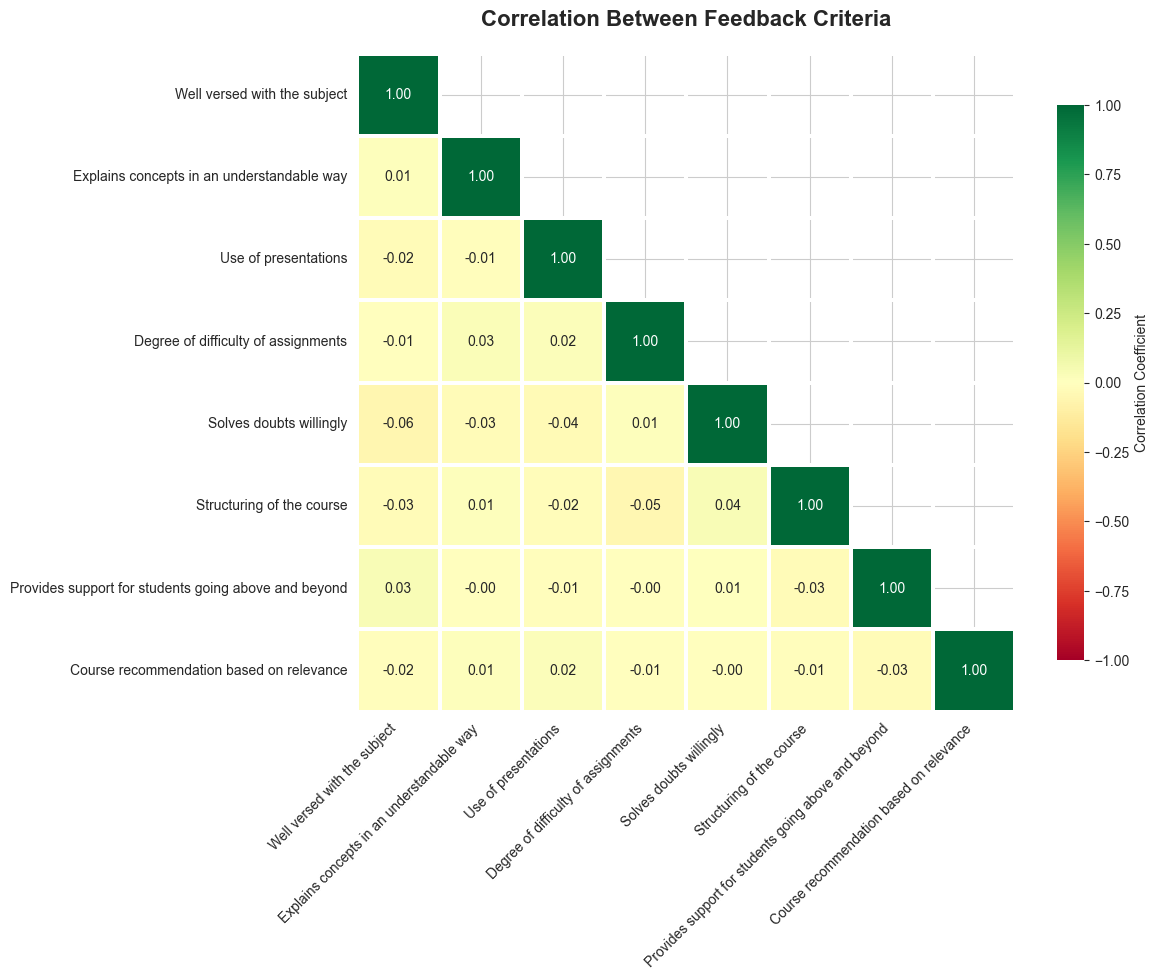

✓ Heatmap saved as 'correlation_heatmap.png'


In [51]:
# Use only the 8 rating columns for correlation
correlation_matrix = df_clean[rating_cols].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # Mask upper triangle

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlGn',
    center=0,
    fmt='.2f',
    square=True,
    linewidths=1.5,
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8},
    vmin=-1,
    vmax=1,
    mask=mask
)

plt.title('Correlation Between Feedback Criteria', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Heatmap saved as 'correlation_heatmap.png'")

----
### SECTION 9 – Identify Strongest & Weakest Areas 

In [52]:
# Recalculate question averages from only rating columns
question_avg_clean = df_clean[rating_cols].mean().sort_values(ascending=False)

print("="*70)
print("🌟 TOP 3 STRONGEST AREAS")
print("="*70)
top_3_strong = question_avg_clean.head(3)
for i, (criterion, score) in enumerate(top_3_strong.items(), 1):
    print(f"  {i}. {criterion}")
    print(f"     Score: {score:.2f}/10")
    print()

print("="*70)
print("⚠️  TOP 3 AREAS FOR IMPROVEMENT")
print("="*70)
top_3_weak = question_avg_clean.tail(3).sort_values()
for i, (criterion, score) in enumerate(top_3_weak.items(), 1):
    print(f"  {i}. {criterion}")
    print(f"     Score: {score:.2f}/10")
    print()

🌟 TOP 3 STRONGEST AREAS
  1. Well versed with the subject
     Score: 7.50/10

  2. Explains concepts in an understandable way
     Score: 6.08/10

  3. Use of presentations
     Score: 5.94/10

⚠️  TOP 3 AREAS FOR IMPROVEMENT
  1. Degree of difficulty of assignments
     Score: 5.43/10

  2. Solves doubts willingly
     Score: 5.47/10

  3. Course recommendation based on relevance
     Score: 5.60/10



------
### SECTION 10 – Identify Students Needing Attention 

In [53]:
# Recalculate Overall_Score from the 8 rating columns only
df_clean['Overall_Score'] = df_clean[rating_cols].mean(axis=1)

low_threshold = 5  # Students scoring below 5 need attention
low_satisfaction = df_clean[df_clean['Overall_Score'] < low_threshold]

print("="*70)
print(f"📉 STUDENTS WITH LOW SATISFACTION (Overall Score < {low_threshold})")
print("="*70)
print(f"Total: {len(low_satisfaction)} students ({len(low_satisfaction)/total_students*100:.1f}%)\n")

if len(low_satisfaction) > 0:
    print("Details (Top 10):")
    low_display = low_satisfaction[['Student ID', 'Overall_Score']].sort_values('Overall_Score').head(10)
    print(low_display.to_string(index=False))
else:
    print("✅ Excellent! No students scored below 5.0")

# High satisfaction
high_threshold = 8
high_satisfaction = df_clean[df_clean['Overall_Score'] >= high_threshold]
print(f"\n{'='*70}")
print(f"🌟 HIGHLY SATISFIED STUDENTS (Overall Score >= {high_threshold})")
print(f"Total: {len(high_satisfaction)} students ({len(high_satisfaction)/total_students*100:.1f}%)")

📉 STUDENTS WITH LOW SATISFACTION (Overall Score < 5)
Total: 138 students (13.8%)

Details (Top 10):
 Student ID  Overall_Score
        281          3.375
         54          3.375
        724          3.500
        450          3.625
         73          3.625
        807          3.750
        983          3.750
        126          3.750
        799          3.875
        178          3.875

🌟 HIGHLY SATISFIED STUDENTS (Overall Score >= 8)
Total: 12 students (1.2%)


_____
### SECTION 11 – Key Insights Summary (FIXED)

In [54]:
# Recalculate with clean data
overall_avg_clean = df_clean[rating_cols].mean().mean()
question_avg_clean = df_clean[rating_cols].mean().sort_values(ascending=False)

insights = {
    'Metric': [
        'Total Students Surveyed',
        'Overall Average Satisfaction',
        'Highest Rated Criterion',
        'Lowest Rated Criterion',
        'Students Scoring >= 8',
        'Students Scoring < 5'
    ],
    'Value': [
        total_students,
        f"{overall_avg_clean:.2f}/10",
        f"{question_avg_clean.idxmax()[:40]}... ({question_avg_clean.max():.2f})",
        f"{question_avg_clean.idxmin()[:40]}... ({question_avg_clean.min():.2f})",
        f"{len(df_clean[df_clean['Overall_Score'] >= 8])} ({len(df_clean[df_clean['Overall_Score'] >= 8])/total_students*100:.1f}%)",
        f"{len(df_clean[df_clean['Overall_Score'] < 5])} ({len(df_clean[df_clean['Overall_Score'] < 5])/total_students*100:.1f}%)"
    ]
}

insights_df = pd.DataFrame(insights)
print("\n" + "="*80)
print("📊 FEEDBACK ANALYSIS - KEY INSIGHTS SUMMARY")
print("="*80)
print(insights_df.to_string(index=False))
print("="*80)


📊 FEEDBACK ANALYSIS - KEY INSIGHTS SUMMARY
                      Metric                                         Value
     Total Students Surveyed                                          1001
Overall Average Satisfaction                                       5.92/10
     Highest Rated Criterion        Well versed with the subject... (7.50)
      Lowest Rated Criterion Degree of difficulty of assignments... (5.43)
       Students Scoring >= 8                                     12 (1.2%)
        Students Scoring < 5                                   138 (13.8%)


___
### SECTION 12 – Actionable Recommendations (FIXED)

In [55]:
print("\n" + "🎯 " + "="*74)
print("KEY RECOMMENDATIONS FOR COURSE/EVENT ORGANIZERS")
print("="*78 + "\n")

# Rec 1: Weakest area
weakest = question_avg_clean.idxmin()
weakest_score = question_avg_clean.min()
print(f"1️⃣  PRIORITY: Improve '{weakest}'")
print(f"   Current Score: {weakest_score:.2f}/10")
print(f"   Status: {'🔴 Critical' if weakest_score < 5 else '🟡 Needs Attention'}")
print(f"   Action: Conduct instructor training, review materials, gather detailed feedback\n")

# Rec 2: Strongest area
strongest = question_avg_clean.idxmax()
strongest_score = question_avg_clean.max()
print(f"2️⃣  LEVERAGE STRENGTH: '{strongest}'")
print(f"   Current Score: {strongest_score:.2f}/10")
print(f"   Action: Document and share best practices with other instructors/departments\n")

# Rec 3: Low performers
low_count = len(df_clean[df_clean['Overall_Score'] < 5])
if low_count > 0:
    print(f"3️⃣  IMMEDIATE FOLLOW-UP: {low_count} Students Need Personal Attention")
    print(f"   Action: Schedule 1-on-1 meetings to understand specific concerns\n")
else:
    print(f"3️⃣  ✅ NO IMMEDIATE CONCERNS: All students scored >= 5.0\n")

# Rec 4: Consistency
question_std_clean = df_clean[rating_cols].std()
most_inconsistent = question_std_clean.idxmax()
print(f"4️⃣  STANDARDIZE: '{most_inconsistent}' Shows High Variability")
print(f"   Std Dev: {question_std_clean.max():.2f}")
print(f"   Action: Create standardized rubrics/guidelines for consistency\n")

print("="*78)


🎯 ==========================================================================
KEY RECOMMENDATIONS FOR COURSE/EVENT ORGANIZERS

1️⃣  PRIORITY: Improve 'Degree of difficulty of assignments'
   Current Score: 5.43/10
   Status: 🟡 Needs Attention
   Action: Conduct instructor training, review materials, gather detailed feedback

2️⃣  LEVERAGE STRENGTH: 'Well versed with the subject'
   Current Score: 7.50/10
   Action: Document and share best practices with other instructors/departments

3️⃣  IMMEDIATE FOLLOW-UP: 138 Students Need Personal Attention
   Action: Schedule 1-on-1 meetings to understand specific concerns

4️⃣  STANDARDIZE: 'Structuring of the course' Shows High Variability
   Std Dev: 2.92
   Action: Create standardized rubrics/guidelines for consistency



____
### SECTION 13 – Export Professional Summary Report 

In [56]:
overall_avg_clean = df_clean[rating_cols].mean().mean()
question_avg_clean = df_clean[rating_cols].mean().sort_values(ascending=False)
question_std_clean = df_clean[rating_cols].std()

summary_text = f"""
╔════════════════════════════════════════════════════════════════════════════╗
║               STUDENT FEEDBACK ANALYSIS - FINAL REPORT                     ║
╚════════════════════════════════════════════════════════════════════════════╝

📈 EXECUTIVE SUMMARY
──────────────────────────────────────────────────────────────────────────────
Total Students Surveyed:                {total_students:>4}
Overall Average Score:                  {overall_avg_clean:>5.2f} / 10.00
High Performers (Score >= 8):           {len(df_clean[df_clean['Overall_Score'] >= 8]):>4} ({len(df_clean[df_clean['Overall_Score'] >= 8])/total_students*100:>5.1f}%)
Low Performers (Score < 5):             {len(df_clean[df_clean['Overall_Score'] < 5]):>4} ({len(df_clean[df_clean['Overall_Score'] < 5])/total_students*100:>5.1f}%)

📊 TOP 3 STRENGTHS
──────────────────────────────────────────────────────────────────────────────
1. {question_avg_clean.index[0][:60]}
   Score: {question_avg_clean.values[0]:.2f}/10

2. {question_avg_clean.index[1][:60]}
   Score: {question_avg_clean.values[1]:.2f}/10

3. {question_avg_clean.index[2][:60]}
   Score: {question_avg_clean.values[2]:.2f}/10

⚠️  TOP 3 IMPROVEMENT AREAS
──────────────────────────────────────────────────────────────────────────────
1. {question_avg_clean.index[-1][:60]}
   Score: {question_avg_clean.values[-1]:.2f}/10 ({'🔴 CRITICAL' if question_avg_clean.values[-1] < 5 else '🟡 NEEDS ATTENTION'})

2. {question_avg_clean.index[-2][:60]}
   Score: {question_avg_clean.values[-2]:.2f}/10

3. {question_avg_clean.index[-3][:60]}
   Score: {question_avg_clean.values[-3]:.2f}/10

🎯 KEY RECOMMENDATIONS
──────────────────────────────────────────────────────────────────────────────
✓ Focus improvement efforts on "{question_avg_clean.idxmin()[:50]}..."
✓ Maintain excellence in "{question_avg_clean.idxmax()[:50]}..."
✓ Follow up with {len(df_clean[df_clean['Overall_Score'] < 5])} low-scoring students
✓ Standardize "{question_std_clean.idxmax()[:50]}..." (high variability detected)

════════════════════════════════════════════════════════════════════════════════
Report Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

print(summary_text)

with open('Feedback_Analysis_Report.txt', 'w', encoding='utf-8') as f:
    f.write(summary_text)

print("\n✅ Professional report saved as 'Feedback_Analysis_Report.txt'")


╔════════════════════════════════════════════════════════════════════════════╗
║               STUDENT FEEDBACK ANALYSIS - FINAL REPORT                     ║
╚════════════════════════════════════════════════════════════════════════════╝

📈 EXECUTIVE SUMMARY
──────────────────────────────────────────────────────────────────────────────
Total Students Surveyed:                1001
Overall Average Score:                   5.92 / 10.00
High Performers (Score >= 8):             12 (  1.2%)
Low Performers (Score < 5):              138 ( 13.8%)

📊 TOP 3 STRENGTHS
──────────────────────────────────────────────────────────────────────────────
1. Well versed with the subject
   Score: 7.50/10

2. Explains concepts in an understandable way
   Score: 6.08/10

3. Use of presentations
   Score: 5.94/10

⚠️  TOP 3 IMPROVEMENT AREAS
──────────────────────────────────────────────────────────────────────────────
1. Degree of difficulty of assignments
   Score: 5.43/10 (🟡 NEEDS ATTENTION)

2. Solves dou

_____
### SECTION 14 – Export Detailed Results to CSV 

In [57]:
question_avg_clean = df_clean[rating_cols].mean().sort_values(ascending=False)
question_std_clean = df_clean[rating_cols].std()

export_df = pd.DataFrame({
    'Criteria': question_avg_clean.index,
    'Average_Score': question_avg_clean.values.round(2),
    'Std_Dev': [question_std_clean[col] for col in question_avg_clean.index],
    'Performance': ['Excellent' if score >= 7 else 'Good' if score >= 6 else 'Fair' if score >= 5 else 'Needs Improvement'
                    for score in question_avg_clean.values],
    'Consistency': ['High' if question_std_clean[col] < 2 else 'Medium' if question_std_clean[col] < 2.5 else 'Low'
                    for col in question_avg_clean.index]
})

print("="*80)
print("CRITERIA PERFORMANCE BREAKDOWN")
print("="*80)
print(export_df.to_string(index=False))
print("\n📁 All deliverables ready for submission!")

CRITERIA PERFORMANCE BREAKDOWN
                                            Criteria  Average_Score  Std_Dev Performance Consistency
                        Well versed with the subject           7.50 1.692998   Excellent        High
          Explains concepts in an understandable way           6.08 2.597168        Good         Low
                                Use of presentations           5.94 1.415853        Fair        High
Provides support for students going above and beyond           5.66 2.891690        Fair         Low
                           Structuring of the course           5.64 2.920212        Fair         Low
            Course recommendation based on relevance           5.60 2.886617        Fair         Low
                             Solves doubts willingly           5.47 2.874648        Fair         Low
                 Degree of difficulty of assignments           5.43 2.869046        Fair         Low

📁 All deliverables ready for submission!
